In [ ]:
#import the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
#Load the data S&P500
data = pd.read_csv('HDFC.csv')
#show the data
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901


<Axes: >

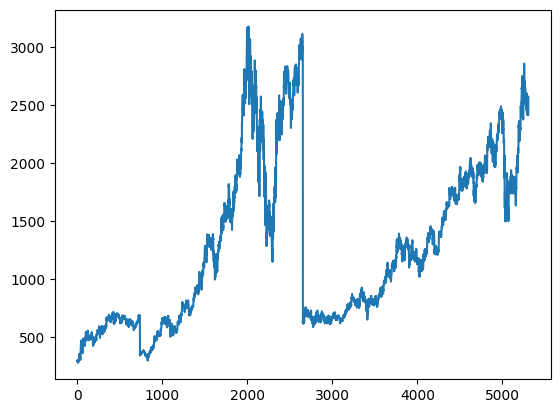

In [ ]:
#Show the data visually
data['Close'].plot()

In [ ]:
#Splt the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]

In [ ]:
#Define the features and target variable
features = ['Open', 'Volume']
target = 'Close'

In [ ]:
#create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[2669.856  2673.047  2718.0356 2737.5996 2825.865  2878.1748 2896.5146
 2730.6897 2707.138  2719.0735 2662.4055 2580.412  2720.6426 2643.6897
 2545.775  2607.289  2601.9917 2581.0735 2616.888  2563.0962 2520.4836
 2587.612  2660.5117 2563.8777 2559.165  2468.7854 2584.812  2480.8286
 2472.1577 2398.0188 2471.7295 2498.0542 2481.2012 2578.6174 2601.9917
 2516.3923 2472.1577 2448.6353 2490.2847 2502.1782 2496.2964 2429.0247
 2336.0872 2477.8733 2558.8904 2490.2847 2478.1277 2421.5186 2439.9756
 2382.4275 2494.158  2498.9495 2591.5198 2576.4958]


In [ ]:
#Show the actual values
print('Actual Value:')
print(test_data[target])

Actual Value:
5252    2747.05
5253    2767.10
5254    2760.60
5255    2791.50
5256    2860.45
5257    2858.65
5258    2805.35
5259    2745.15
5260    2741.30
5261    2651.95
5262    2628.60
5263    2707.75
5264    2684.70
5265    2539.40
5266    2606.00
5267    2564.00
5268    2654.90
5269    2582.95
5270    2543.90
5271    2510.25
5272    2577.30
5273    2599.80
5274    2568.00
5275    2535.50
5276    2510.40
5277    2515.55
5278    2514.60
5279    2531.65
5280    2531.85
5281    2509.90
5282    2465.75
5283    2470.75
5284    2532.75
5285    2605.65
5286    2498.10
5287    2531.45
5288    2445.85
5289    2472.30
5290    2482.70
5291    2502.55
5292    2513.90
5293    2419.85
5294    2512.95
5295    2547.15
5296    2574.05
5297    2492.35
5298    2415.90
5299    2479.70
5300    2497.35
5301    2509.80
5302    2518.40
5303    2577.00
5304    2538.85
5305    2420.10
Name: Close, dtype: float64


In [ ]:
#Show the models accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy')
print(accuracy)

Accuracy
0.6528455473232108


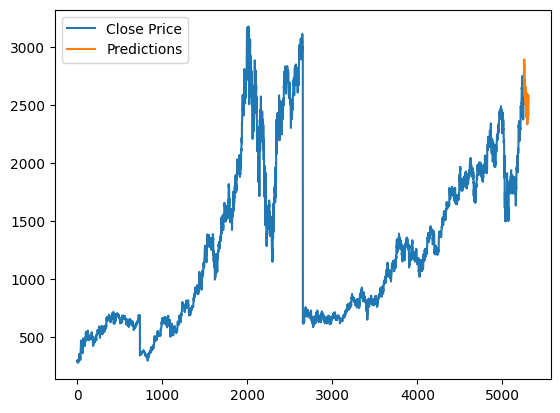

In [ ]:
#Plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()